In [1]:
import pandas as pd
file_name = '/content/HR-Employee-Attrition.csv'
hr_data = pd.read_csv(file_name)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Dataset Information:")
hr_data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Job

In [3]:
missing_values = hr_data.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values[missing_values > 0])




Missing Values per Column:
Series([], dtype: int64)


In [4]:
print("\nSummary Statistics:")
print(hr_data.describe())


Summary Statistics:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        6

<ipython-input-5-ec6f53be9f2d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='viridis')


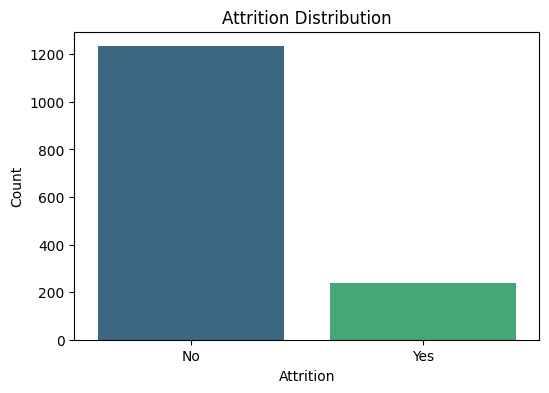

In [5]:
# Attrition distribution
attrition_counts = hr_data['Attrition'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='viridis')
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

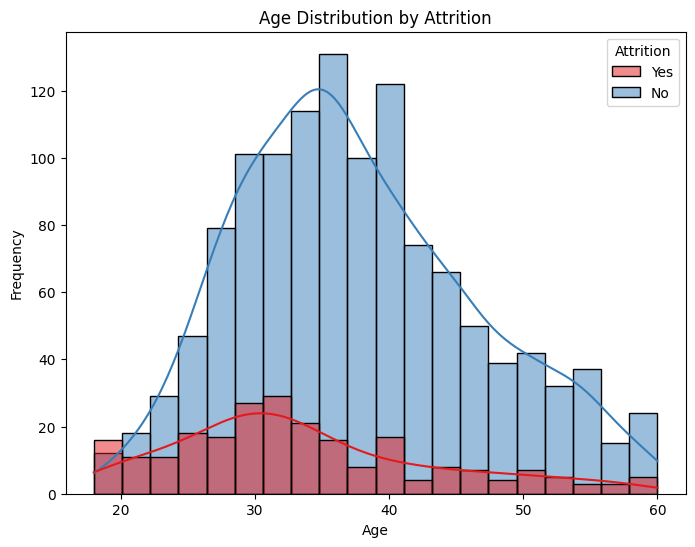

In [9]:
# Age distribution by Attrition
plt.figure(figsize=(8, 6))
sns.histplot(data=hr_data, x='Age', hue='Attrition', kde=True, palette='Set1', bins=20)
plt.title('Age Distribution by Attrition')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

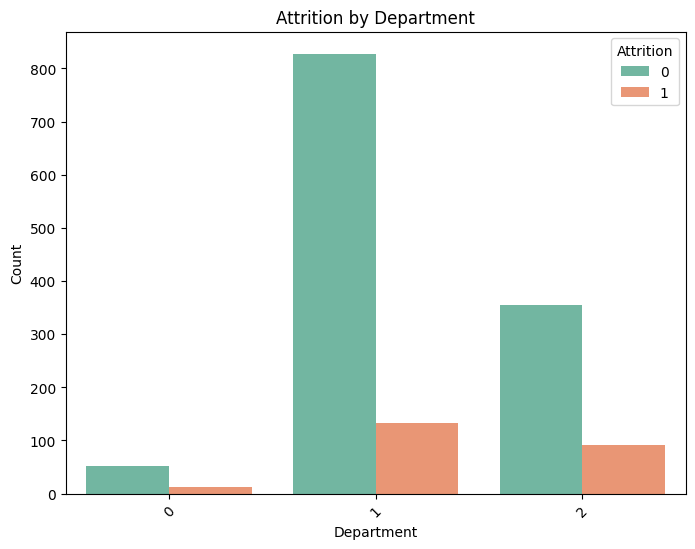

In [25]:

# Department-wise Attrition
plt.figure(figsize=(8, 6))
sns.countplot(data=hr_data, x='Department', hue='Attrition', palette='Set2')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


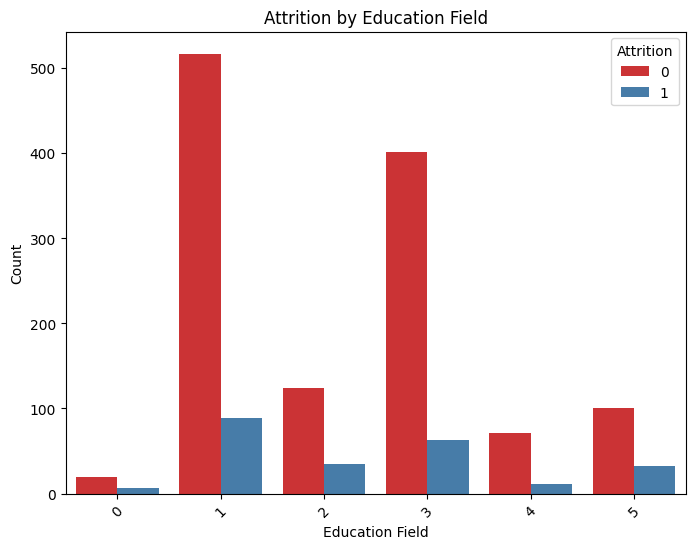

In [19]:
# Attrition by Education Field
plt.figure(figsize=(8, 6))
sns.countplot(data=hr_data, x='EducationField', hue='Attrition', palette='Set1')
plt.title('Attrition by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-27-7e6804489d2f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hr_data, x='Attrition', y='MonthlyIncome', palette='Set2')


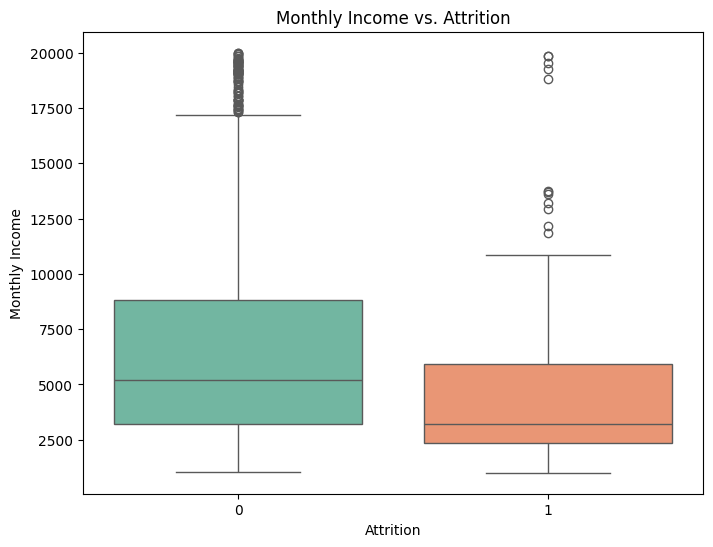

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly Income vs. Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(data=hr_data, x='Attrition', y='MonthlyIncome', palette='Set2')
plt.title('Monthly Income vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()






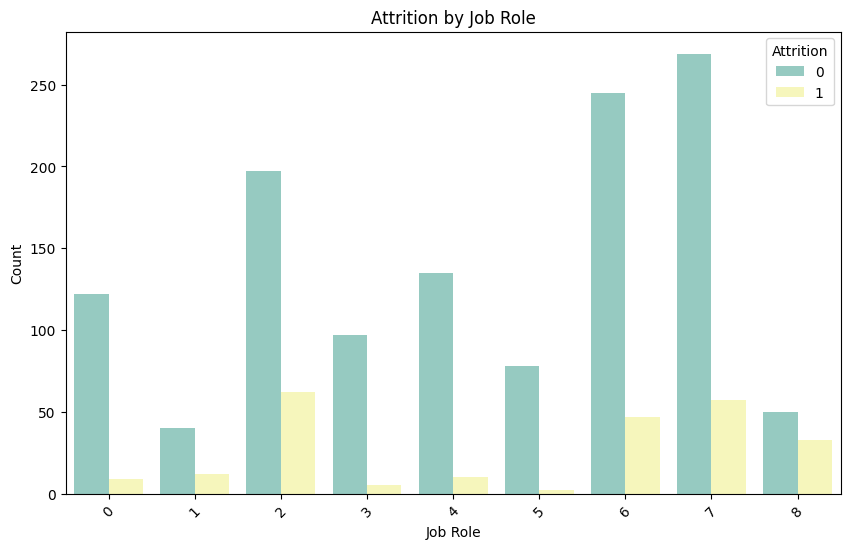

In [20]:
# Job Role vs. Attrition
plt.figure(figsize=(10, 6))
sns.countplot(data=hr_data, x='JobRole', hue='Attrition', palette='Set3')
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [13]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in hr_data.select_dtypes(include=['object']).columns:
    hr_data[column] = label_encoder.fit_transform(hr_data[column])


In [14]:
# Define features and target variable
X = hr_data.drop(['Attrition'], axis=1)
y = hr_data['Attrition']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
# Build a Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [16]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
[[239   8]
 [ 42   5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.38      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.62      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294


ROC-AUC Score: 0.7975708502024291


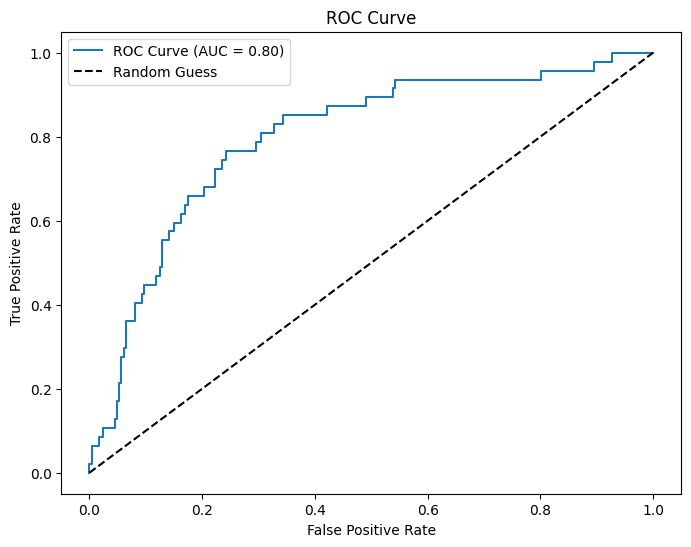

In [17]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [18]:
attrition_rate = hr_data['Attrition'].value_counts(normalize=True) * 100
print("Attrition Rate:")
print(attrition_rate)

Attrition Rate:
Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64
